# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
# Inspect the shapes of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')

Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


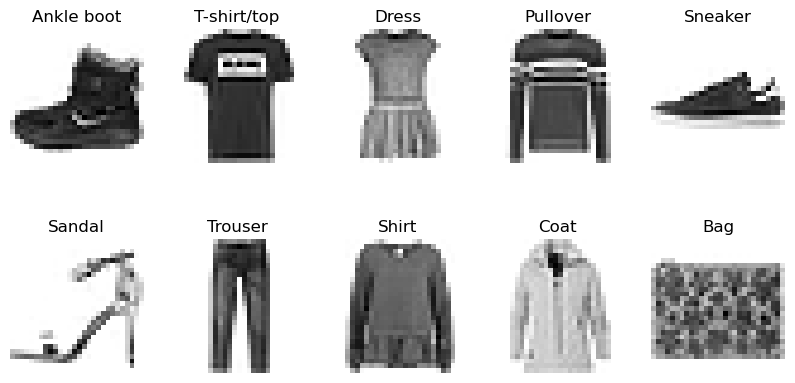

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Find one example of each class in the training set
unique_classes = []
indices = []
for i, label in enumerate(y_train):
    if label not in unique_classes:
        unique_classes.append(label)
        indices.append(i)
    if len(unique_classes) == 10:
        break

# Plot the examples
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')

plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

Each image clearly represents clothing item in all 10 categories. The data appears correctly loaded and labeled.
Low resolution and visual similarity between certain clothing categories (t-short, dress, shirt) may cause misclassification during training.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.losses import CategoricalCrossentropy

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(y_train.shape[1]))

# Compile model with categorical_crossentropy loss
model.compile(
    optimizer='sgd',
    #loss='categorical_crossentropy',
    loss = CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.6584 - loss: 1.0825
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8043 - loss: 0.6046
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8178 - loss: 0.5509
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8302 - loss: 0.5125
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8300 - loss: 0.5043
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8318 - loss: 0.4968
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8411 - loss: 0.4720
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8439 - loss: 0.4669
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8428 - loss: 0.4664
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8446 - loss: 0.4584
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8484 - loss: 0.4486
Epoch 12/15
1875/1875 ━━━━━

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

The baseline model achieved approx. 83% test accuracy and loss is 0.47 with a simple linear model. It performed reasonably well because some classes are visually distinct, but struggles with slight differences (i.e shirts vs pullovers). Flattening images loses spatial information, so the model cannot capture shapes or textures. The baseline model is a good candidate for improvement.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [6]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a simple CNN model
model = Sequential()

#Add layers to the model
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/10


c:\Users\suni\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8142 - loss: 0.5220
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9050 - loss: 0.2673
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9204 - loss: 0.2164
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9318 - loss: 0.1828
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9456 - loss: 0.1541
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9519 - loss: 0.1310
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9595 - loss: 0.1101
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9687 - loss: 0.0869
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9732 - loss: 0.0742
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9778 - loss: 0.0633
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9108 - loss: 0.3262
Loss:     0.32
Accuracy: 91.21%


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

The CNN model performed better than the baseline model. To compare, the baseline model accuracy is approx. 83%, CNN model accuracy approx. 91%
This improvement comes from the CNN’s ability to capture spatial features in image and it achieved higher accuracy.


# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [7]:
# Re-initialize the model
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Load dataset
(X_train, y_train_orig), (X_test, y_test_orig) = fashion_mnist.load_data()

# Normalize images
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# Reshape to include channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train_orig, 10)
y_test  = to_categorical(y_test_orig, 10)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [8]:
# A. Test Hyperparameters: Number of filters

filter_options = [32, 64, 128]
results_filters = {}

for filters in filter_options:
    print(f"\nTraining model with {filters} filters...")
    
    # Define model
    model = Sequential([
        Conv2D(filters, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results_filters[filters] = test_acc
    print(f"Test Accuracy with {filters} filters: {test_acc:.4f}")



Training model with 32 filters...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7852 - loss: 0.6116 - val_accuracy: 0.8863 - val_loss: 0.3157
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8944 - loss: 0.2935 - val_accuracy: 0.8995 - val_loss: 0.2818
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9099 - loss: 0.2466 - val_accuracy: 0.9048 - val_loss: 0.2638
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9210 - loss: 0.2169 - val_accuracy: 0.8992 - val_loss: 0.2759
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9305 - loss: 0.1921 - val_accuracy: 0.9060 - val_loss: 0.2546
Test Accuracy with 32 filters: 0.9057

Training model with 64 filters...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7902 - loss: 0.5889 - val_accuracy: 0.8890 - val_loss: 0.3104
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8956 - loss: 0.2877 - val_accuracy: 0.8967 - val_loss: 

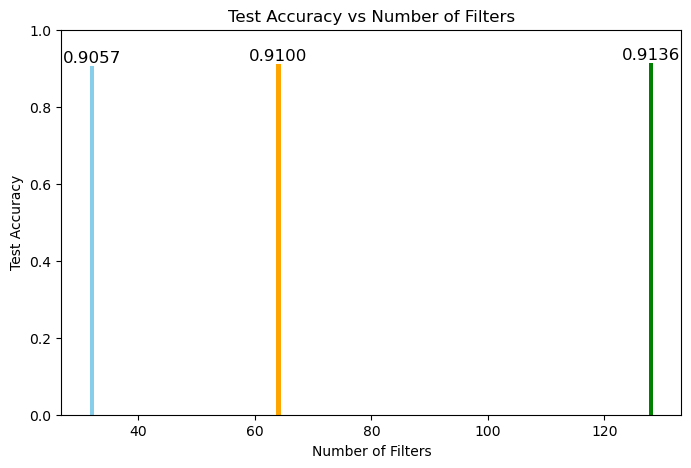

In [9]:
# Visualize filter results
import matplotlib.pyplot as plt

# Extract filter counts and corresponding accuracies
filters = list(results_filters.keys())
accuracies = list(results_filters.values())

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(filters, accuracies, color=['skyblue', 'orange', 'green'])
plt.title("Test Accuracy vs Number of Filters")
plt.xlabel("Number of Filters")
plt.ylabel("Test Accuracy")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(filters[i], acc + 0.01, f"{acc:.4f}", ha='center', fontsize=12)
plt.show()


In [10]:
# Re-initialize the model
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Load dataset
(X_train, y_train_orig), (X_test, y_test_orig) = fashion_mnist.load_data()

# Normalize images
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# Reshape to include channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train_orig, 10)
y_test  = to_categorical(y_test_orig, 10)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [11]:
#Regularization Experiment: Dropout
dropout_options = [0.0, 0.25]  # 0 = no dropout, 0.25 = dropout
results_dropout = {}

for dropout_rate in dropout_options:
    print(f"\nTraining model with Dropout rate {dropout_rate}...")
    
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)
    
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results_dropout[dropout_rate] = test_acc
    print(f"Test Accuracy with Dropout {dropout_rate}: {test_acc:.4f}")



Training model with Dropout rate 0.0...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7907 - loss: 0.5962 - val_accuracy: 0.8802 - val_loss: 0.3302
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8944 - loss: 0.2951 - val_accuracy: 0.9011 - val_loss: 0.2775
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9112 - loss: 0.2458 - val_accuracy: 0.9043 - val_loss: 0.2662
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9204 - loss: 0.2147 - val_accuracy: 0.9083 - val_loss: 0.2595
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9311 - loss: 0.1897 - val_accuracy: 0.9060 - val_loss: 0.2569
Test Accuracy with Dropout 0.0: 0.9043

Training model with Dropout rate 0.25...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7653 - loss: 0.6690 - val_accuracy: 0.8790 - val_loss: 0.3369
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8841 - loss: 0.3223 - val_accuracy: 0.8975

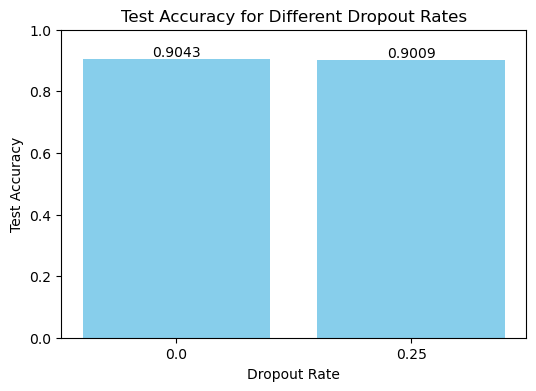

In [12]:
# Visualize dropout results
import matplotlib.pyplot as plt

# Dropout rates and corresponding test accuracies
dropout_rates = list(results_dropout.keys())
accuracies = list(results_dropout.values())

# Create bar plot
plt.figure(figsize=(6,4))
plt.bar([str(dr) for dr in dropout_rates], accuracies, color='skyblue')
plt.xlabel("Dropout Rate")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy for Different Dropout Rates")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center')
plt.show()


In [13]:
# B. Test presence or absence of regularization

# Re-initialize the model
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Load dataset
(X_train, y_train_orig), (X_test, y_test_orig) = fashion_mnist.load_data()

# Normalize
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# Reshape to include channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train_orig, 10)
y_test  = to_categorical(y_test_orig, 10)


In [14]:
# Experiment: Dropout Regularization
use_dropout = [False, True]  # Test absence and presence of dropout
results_dropout = {}

for dropout_flag in use_dropout:
    print(f"\nTraining model with dropout = {dropout_flag}...")

    # Define CNN model
    model = Sequential()
    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    if dropout_flag:
        model.add(Dropout(0.5))  # Add dropout only if True
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    
    if dropout_flag:
        model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results_dropout[dropout_flag] = test_acc
    print(f"Test Accuracy with dropout={dropout_flag}: {test_acc:.4f}")




Training model with dropout = False...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8031 - loss: 0.5588 - val_accuracy: 0.8900 - val_loss: 0.3100
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8975 - loss: 0.2806 - val_accuracy: 0.8945 - val_loss: 0.2909
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9152 - loss: 0.2283 - val_accuracy: 0.9018 - val_loss: 0.2732
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9294 - loss: 0.1961 - val_accuracy: 0.9062 - val_loss: 0.2551
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9384 - loss: 0.1665 - val_accuracy: 0.9003 - val_loss: 0.2701
Test Accuracy with dropout=False: 0.8946

Training model with dropout = True...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7382 - loss: 0.7365 - val_accuracy: 0.8748 - val_loss: 0.3417
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8667 - loss: 0.3806 - val_accuracy: 0.8

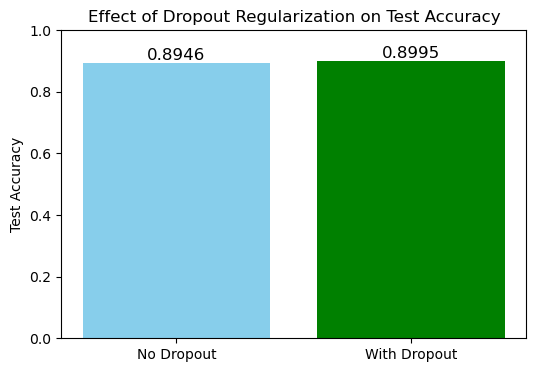

In [15]:
# Visualize dropout results
import matplotlib.pyplot as plt

# Labels for the experiment
dropout_labels = ['No Dropout', 'With Dropout']
# Get the corresponding accuracies
accuracies = [results_dropout[False], results_dropout[True]]

# Create a bar plot
plt.figure(figsize=(6,4))
plt.bar(dropout_labels, accuracies, color=['skyblue','green'])
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.ylabel("Test Accuracy")
plt.title("Effect of Dropout Regularization on Test Accuracy")

# Annotate bars with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', fontsize=12)

plt.show()

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

Increasing the number of filters improved performance by allowing the model to capture richer features. Using dropout helped improve generalization by preventing overfitting. The best results were achieved with 128 filters combined with dropout regularization.


# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [16]:
# Re-initialize the model
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

#Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Limit to first 60,000 train and 10,000 test samples
X_train = X_train[:60000]
X_test  = X_test[:10000]
y_train = y_train[:60000].astype('int')
y_test  = y_test[:10000].astype('int')

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Define the final CNN model with best hyperparameters
final_model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),  # regularization
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),   # regularization
    Dense(10, activation='softmax')
])

# Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the final model
history = final_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

#Evaluate the final model
test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Model Test Loss: {test_loss:.4f}")
print(f"Final Model Test Accuracy: {test_acc:.4f}")


X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8508 - loss: 0.4952 - val_accuracy: 0.9756 - val_loss: 0.0867
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9644 - loss: 0.1187 - val_accuracy: 0.9816 - val_loss: 0.0637
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9737 - loss: 0.0853 - val_accuracy: 0.9841 - val_loss: 0.0529
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9771 - loss: 0.0748 - val_accuracy: 0.9844 - val_loss: 0.0546
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9809 - loss: 0.0617 - val_accuracy: 0.9862 - val_loss: 0.0512
Final Model Test Loss: 0.0419
Final Model Test Accuracy: 0.9855


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

The final CNN outperformed both the baseline and simpler CNNs, achieving higher accuracy and lower loss. It's convolutional layers captured image patterns more effectively than the baseline fully connected network, and dropout reduced overfitting for smoother training. Using 64 filters and a dense layer with 128 neurons improved feature learning, while normalized inputs and one-hot labels helped stable training. Further gains could come from tuning hyperparameters or trying different optimizers.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.